In [1]:
!pip install pandas numby torch torchvision

  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 MB 139.6 kB/s eta 0:00:0000:0200:09
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 317.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 365.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 952.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 752.2 kB/s eta 0:00:00:--:--

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('ramen-ratings.csv')

In [17]:
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

In [14]:
df['Stars'].unique()

array([3.75 , 1.   , 2.25 , 2.75 , 4.75 , 4.   , 0.25 , 2.5  , 5.   ,
       4.25 , 4.5  , 3.5  ,   nan, 1.5  , 3.25 , 2.   , 0.   , 3.   ,
       0.5  , 3.8  , 4.3  , 2.3  , 3.3  , 1.75 , 0.75 , 1.25 , 1.1  ,
       2.1  , 0.9  , 3.1  , 4.125, 3.125, 2.125, 2.9  , 0.1  , 2.8  ,
       3.7  , 3.4  , 3.6  , 2.85 , 3.2  , 3.65 , 1.8  ])

In [15]:
df.head()
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2577 non-null   float64
 6   Top Ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 141.2+ KB


,Review #,Stars
count,2580.000000,2577.000000
mean,1290.500000,3.654676
std,744.926171,1.015331
min,1.000000,0.000000
25%,645.750000,3.250000
50%,1290.500000,3.750000
75%,1935.250000,4.250000
max,2580.000000,5.000000


In [16]:
df.groupby('Country')['Stars'].mean().sort_values(ascending=False)

Country
Brazil           4.350000
Sarawak          4.333333
Cambodia         4.200000
Malaysia         4.154194
Singapore        4.126147
Indonesia        4.067460
Japan            3.981605
Myanmar          3.946429
Fiji             3.875000
Hong Kong        3.801825
South Korea      3.790554
United States    3.750000
Mexico           3.730000
Bangladesh       3.714286
Taiwan           3.665402
Germany          3.638889
Poland           3.625000
Hungary          3.611111
Dubai            3.583333
Finland          3.583333
Holland          3.562500
Nepal            3.553571
Estonia          3.500000
Ghana            3.500000
USA              3.457043
China            3.421893
India            3.395161
Thailand         3.384817
Philippines      3.329787
Colombia         3.291667
Sweden           3.250000
Vietnam          3.187963
Australia        3.138636
Pakistan         3.000000
UK               2.997101
Netherlands      2.483333
Canada           2.243902
Nigeria          1.500000
Name

In [17]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [19]:
import matplotlib.pyplot as plt

In [20]:
stars = df['Stars'].dropna().to_numpy()

In [23]:
mean_np = np.mean(stars)
var_np = np.var(stars)

In [24]:
mean_np, var_np

(np.float64(3.6546759798214974), np.float64(1.0304961794501943))

In [25]:
d2 = stars - mean_np
np.sum(d2 ** 2) / len(stars)

np.float64(1.0304961794501943)

1) Распределение оценок по странам

In [51]:
# получим топ 3 страны по средним оценкам
df_for_view = df.groupby('Country')['Stars'].mean().sort_values(ascending=False).head(3)
top_countries = df_for_view.index.tolist()

In [53]:
# берем данные из фрейма ток по этим странам
df_for_view = df[df['Country'].isin(top_countries)]

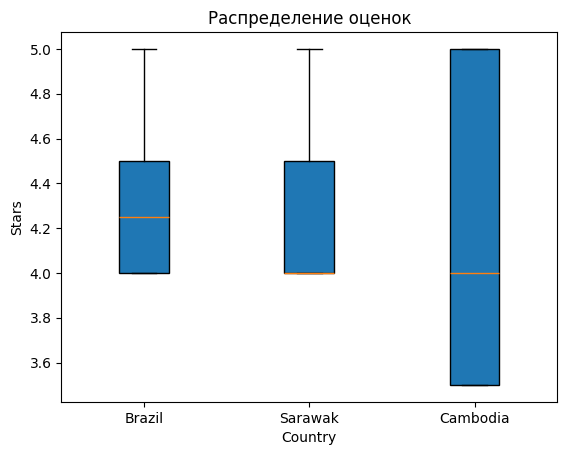

In [58]:

data_by_country = [df_for_view[df_for_view["Country"] == c]["Stars"].values for c in top_countries]

plt.boxplot(data_by_country, tick_labels=top_countries, patch_artist=True)
plt.title("Распределение оценок")
plt.xlabel("Country")
plt.ylabel("Stars")
plt.show()

2) Нормализация оценок по странам

In [64]:
def z_norm(x: pd.Series) -> pd.Series:
    return (x - x.mean()) / x.std()

# transform применяет для каждого элемента векторов Stars функцию
df["Stars_z_normalized"] = df.groupby("Country")["Stars"].transform(z_norm)
df

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Stars_z_normalized
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,-0.253465
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN,-2.306518
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,-1.143279
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,-0.792147
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,0.394901
...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,NaN,0.367003
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,NaN,-2.434788
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,NaN,-1.413834
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,NaN,-1.413834


3) Топ-5 по странам

Вообще, задание чуть двоякое, поэтому сделаю для каждой интерпритации:
1) Вывести топ в каждой стране
2) Между всеми странами


In [67]:
# первая
df.sort_values(["Country", "Stars"], ascending=[True, False]).groupby("Country").head(5)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Stars_z_normalized
512,2068,Maggi,Fusian Special Edition Ow... Ow... Spicy Cow M...,Pack,Australia,5.00,NaN,2.079233
538,2042,Suimin,Noodles Mi Goreng,Cup,Australia,4.30,NaN,1.297299
272,2308,Fantastic,Noodles Chicken Chow Mein Flavour,Cup,Australia,4.00,NaN,0.962185
306,2274,Suimin,Noodles With Braised Beef Flavour,Cup,Australia,4.00,NaN,0.962185
327,2253,Singa-Me,Instant Noodles Mi Goreng Flavour,Cup,Australia,4.00,NaN,0.962185
...,...,...,...,...,...,...,...,...
226,2354,Vifon,Viet Cuisine Bun Rieu Cua Sour Crab Soup Insta...,Bowl,Vietnam,5.00,NaN,2.131231
2133,447,Ve Wong,Little Prince Bacon,Pack,Vietnam,4.75,NaN,1.837193
2218,362,Vina Acecook,Daily Hot & Sour With Shrimp,Pack,Vietnam,4.50,NaN,1.543155
1725,855,Vina Acecook,Bestcook Hot & Sour Shrimp,Bowl,Vietnam,4.25,NaN,1.249117


In [68]:
# вторая (для нее можно использовать z-нормализованную оценку)

df.sort_values("Stars_z_normalized", ascending=False).head(5)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Stars_z_normalized
89,2491,Nissin,Soba Yakitori Chicken,Cup,Germany,5.0,NaN,2.739842
245,2335,Nissin,Cup Noodles Gourmet Sabor A Caldo De Camaron,Cup,Mexico,5.0,NaN,2.625636
226,2354,Vifon,Viet Cuisine Bun Rieu Cua Sour Crab Soup Insta...,Bowl,Vietnam,5.0,NaN,2.131231
1031,1549,Sapporo Ichiban,Chow Mein Japanese Style Noodles Yakisoba,Pack,Canada,5.0,NaN,2.126597
1239,1341,Plats Du Chef,Cuisine Adventures Chicken Pho Soup,Bowl,Canada,5.0,NaN,2.126597


4) Найти рамены, которые продаются в нескольких странах и на основе них скорректировать оценку

In [18]:
# проверим, есть ли вообще рамены, которые были оценены в нескольких странах
worldwide_ramens = df.groupby(["Brand", "Variety"])["Country"].nunique().reset_index(name="unique_countries").sort_values("unique_countries", ascending=False)
worldwide_ramens_brand_name = list(map(tuple, worldwide_ramens[worldwide_ramens["unique_countries"] > 1][["Brand", "Variety"]].to_numpy()))
worldwide_ramens_brand_name

[('Maggi', '2 Minute Noodles Curry Flavour'),
 ('Nissin', 'Cup Noodles Chilli Crab Flavour'),
 ('Nongshim', 'Soon Veggie Noodle Soup'),
 ('Sapporo Ichiban', 'Shrimp Flavor'),
 ('Saigon Ve Wong', 'Kung Fu Artificial Beef Rice Noodle'),
 ('Nissin', 'Cup Noodles Black Pepper Crab Flavour'),
 ('Nissin', 'Cup Noodles Seafood')]

Заметим, что некоторые рамены продаются в разных странах, но кол-во уникальных стран не большое, что не хорошо для корректировки

In [22]:
filtered = df[df[["Brand", "Variety"]].apply(tuple, axis=1).isin(worldwide_ramens_brand_name)].sort_values(["Brand", "Variety"])

# сейчас найдем коэф корректировки основываясь на бренд+вкус
brand_variety_means = filtered.groupby(["Brand", "Variety"])["Stars"].mean().reset_index()
#

# # # среднее по всем странам, чтобы найти отклонения
global_mean = brand_variety_means["Stars"].mean()
#
df_country_means = filtered.groupby("Country")["Stars"].mean().reset_index()
#
# # получим отклонения в каждой стране
df_country_means["shift"] = df_country_means["Stars"] - global_mean


np.float64(3.8392857142857144)

In [20]:
country_shift_map = dict(zip(df_country_means["Country"], df_country_means["shift"]))

df["adjusted_stars"] = df.apply(
    lambda row: row["Stars"] - country_shift_map.get(row["Country"], 0), axis=1
)
df

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,adjusted_stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,5.089286
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN,1.000000
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,2.714286
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,2.750000
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,3.750000
...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,NaN,3.089286
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,NaN,1.000000
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,NaN,2.000000
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,NaN,2.000000


In [23]:
df[df["Variety"] == "Singapore Curry"]["Stars"].mean()

np.float64(3.75)